In [24]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use("default")

NN에서는 변수 초기화 <br>
레이어 10개, 각 레이어에는 500개의 뉴런이 있다고 가정

1. small random number <br>
평균 0, 표준편차 0.01 가우시안분포 <br>
w = np.random.randn(입력, 출력) *0.01

In [107]:
np.random.seed(0)
D = np.random.randn(1000, 500)
hidden_layer_sizes = [500]*10

Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1]
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    w = np.random.randn(fan_in, fan_out)*0.01
    H = np.dot(X, w)
    H = np.tanh(H)
    Hs[i] = H      
print("입력계층 평균 %f and 표준편차 %f" % (np.mean(D), np.std(D)))
layer_means= [np.mean(H) for i, H in Hs.items()]
layer_stds= [np.std(H) for i, H in Hs.items()]

for i, H in Hs.items():
    print("히든 계층 %d 평균 %f and 표준편차 %f" % (i+1, layer_means[i], layer_stds[i]))
# 층이 깊어지면 0으로 수렴

입력계층 평균 0.002633 and 표준편차 0.999400
히든 계층 1 평균 -0.000024 and 표준편차 0.213232
히든 계층 2 평균 -0.000041 and 표준편차 0.047700
히든 계층 3 평균 -0.000002 and 표준편차 0.010625
히든 계층 4 평균 0.000002 and 표준편차 0.002383
히든 계층 5 평균 0.000002 and 표준편차 0.000531
히든 계층 6 평균 0.000000 and 표준편차 0.000119
히든 계층 7 평균 -0.000000 and 표준편차 0.000027
히든 계층 8 평균 -0.000000 and 표준편차 0.000006
히든 계층 9 평균 -0.000000 and 표준편차 0.000001
히든 계층 10 평균 0.000000 and 표준편차 0.000000


Text(0.5, 1.0, 'layer_std')

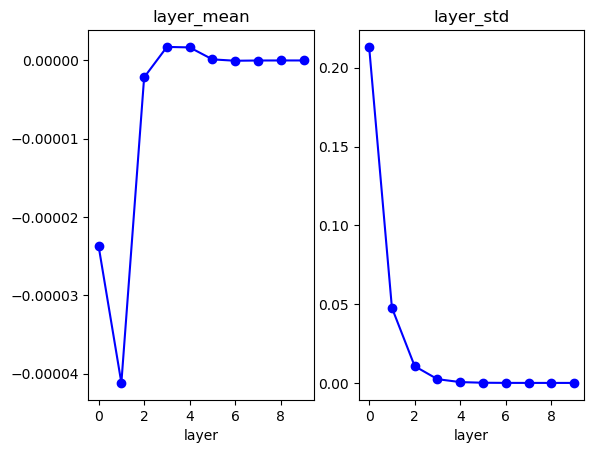

In [108]:
plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.xlabel("layer")
plt.title("layer_mean")

plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'ob-')
plt.xlabel("layer")
plt.title("layer_std")

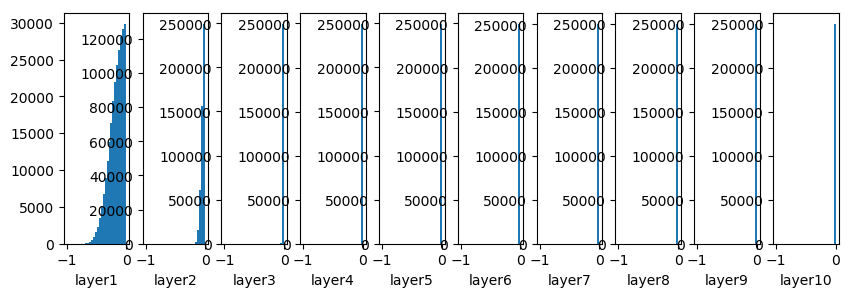

In [122]:
fig = plt.figure(figsize=(10,3))
for i, H in Hs.items():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel(), 30, range(-1, 1))
    plt.xlabel("layer" + str(i+1))
# plt.subplots_adjust(wspace = 5)
plt.show()

평균 0 표준편차 1

입력계층 평균 0.002633 and 표준편차 0.999400
히든 계층 1 평균 -0.001038 and 표준편차 0.982079
히든 계층 2 평균 -0.000554 and 표준편차 0.981843
히든 계층 3 평균 0.002579 and 표준편차 0.981697
히든 계층 4 평균 0.000483 and 표준편차 0.981623
히든 계층 5 평균 0.002125 and 표준편차 0.981458
히든 계층 6 평균 0.001215 and 표준편차 0.981586
히든 계층 7 평균 -0.001980 and 표준편차 0.981720
히든 계층 8 평균 -0.001687 and 표준편차 0.981733
히든 계층 9 평균 0.002889 and 표준편차 0.981421
히든 계층 10 평균 0.002507 and 표준편차 0.981750


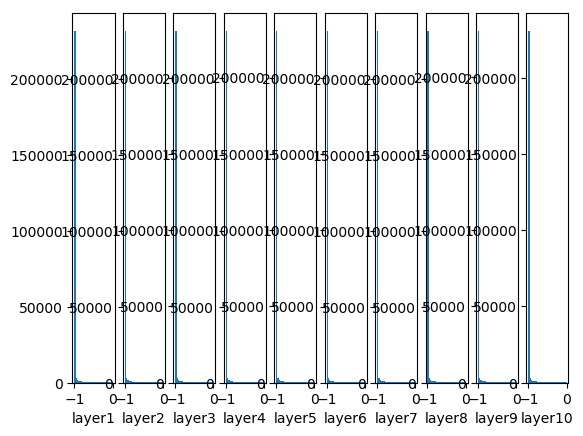

In [33]:
np.random.seed(0)
D = np.random.randn(1000, 500)
hidden_layer_sizes = [500]*10

Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1]
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    w = np.random.randn(fan_in, fan_out)
    H = np.dot(X, w)
    H = np.tanh(H)
    Hs[i] = H      
print("입력계층 평균 %f and 표준편차 %f" % (np.mean(D), np.std(D)))
layer_means= [np.mean(H) for i, H in Hs.items()]
layer_stds= [np.std(H) for i, H in Hs.items()]

for i, H in Hs.items():
    print("히든 계층 %d 평균 %f and 표준편차 %f" % (i+1, layer_means[i], layer_stds[i]))

plt.figure()
for i, H in Hs.items():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel(), 30, range(-1, 1))
    plt.xlabel("layer" + str(i+1))
plt.show()

입력계층 평균 0.002633 and 표준편차 0.999400
히든 계층 1 평균 -0.000192 and 표준편차 0.627232
히든 계층 2 평균 -0.000426 and 표준편차 0.486583
히든 계층 3 평균 0.000275 and 표준편차 0.407249
히든 계층 4 평균 0.000121 and 표준편차 0.357539
히든 계층 5 평균 0.000897 and 표준편차 0.320341
히든 계층 6 평균 0.000111 and 표준편차 0.293453
히든 계층 7 평균 -0.000293 and 표준편차 0.272871
히든 계층 8 평균 -0.000300 and 표준편차 0.254954
히든 계층 9 평균 -0.000052 and 표준편차 0.239450
히든 계층 10 평균 0.000079 and 표준편차 0.226572


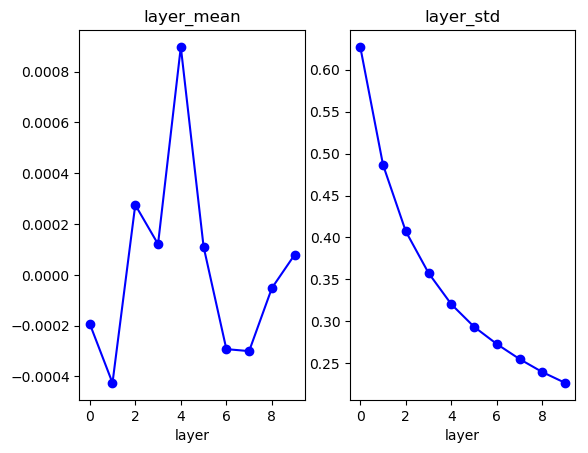

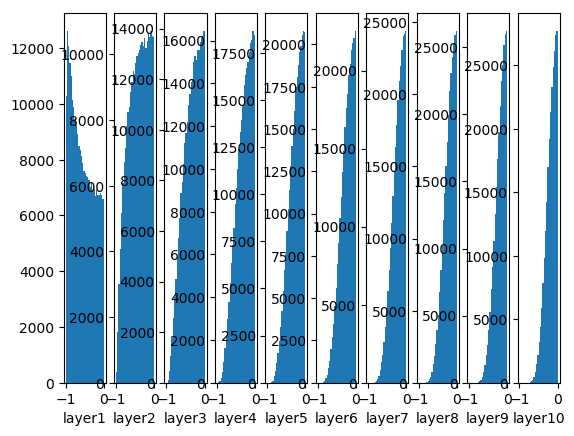

In [43]:
np.random.seed(0)
D = np.random.randn(1000, 500)
hidden_layer_sizes = [500]*10

Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1]
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    # Xavier 초기화
    w = np.random.randn(fan_in, fan_out)/np.sqrt(fan_in)
    H = np.dot(X, w)
    H = np.tanh(H)
    Hs[i] = H      
print("입력계층 평균 %f and 표준편차 %f" % (np.mean(D), np.std(D)))
layer_means= [np.mean(H) for i, H in Hs.items()]
layer_stds= [np.std(H) for i, H in Hs.items()]

for i, H in Hs.items():
    print("히든 계층 %d 평균 %f and 표준편차 %f" % (i+1, layer_means[i], layer_stds[i]))

plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.xlabel("layer")
plt.title("layer_mean")

plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'ob-')
plt.xlabel("layer")
plt.title("layer_std")    
    
plt.figure()
for i, H in Hs.items():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel(), 30, range(-1, 1))
    plt.xlabel("layer" + str(i+1))
plt.show()

입력계층 평균 0.002633 and 표준편차 0.999400
히든 계층 1 평균 -0.000246 and 표준편차 0.720519
히든 계층 2 평균 -0.000674 and 표준편차 0.633954
히든 계층 3 평균 0.000734 and 표준편차 0.594694
히든 계층 4 평균 0.000326 and 표준편차 0.576818
히든 계층 5 평균 0.001263 and 표준편차 0.565604
히든 계층 6 평균 -0.000083 and 표준편차 0.561472
히든 계층 7 평균 -0.000716 and 표준편차 0.559427
히든 계층 8 평균 -0.000640 and 표준편차 0.557508
히든 계층 9 평균 0.000197 and 표준편차 0.555948
히든 계층 10 평균 0.000093 and 표준편차 0.554938


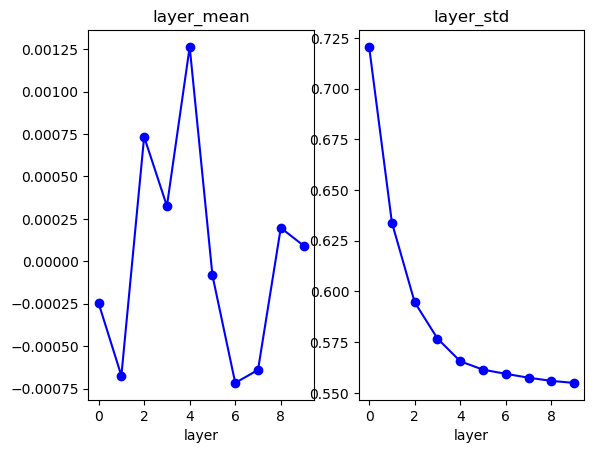

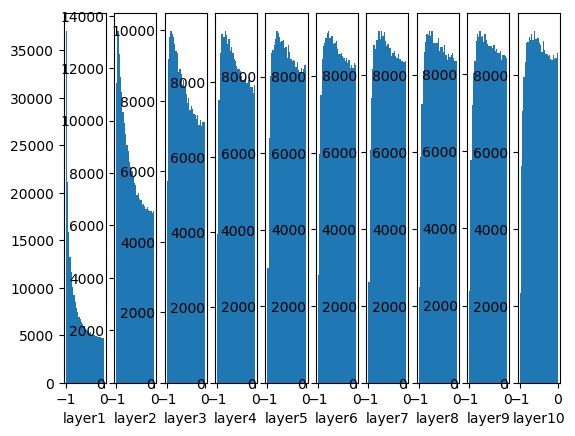

In [42]:
np.random.seed(0)
D = np.random.randn(1000, 500)
hidden_layer_sizes = [500]*10

Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1]
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    # He 초기화
    w = np.random.randn(fan_in, fan_out)/np.sqrt(fan_in/2)
    H = np.dot(X, w)
    H = np.tanh(H)
    Hs[i] = H      
print("입력계층 평균 %f and 표준편차 %f" % (np.mean(D), np.std(D)))
layer_means= [np.mean(H) for i, H in Hs.items()]
layer_stds= [np.std(H) for i, H in Hs.items()]

for i, H in Hs.items():
    print("히든 계층 %d 평균 %f and 표준편차 %f" % (i+1, layer_means[i], layer_stds[i]))

plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.xlabel("layer")
plt.title("layer_mean")

plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'ob-')
plt.xlabel("layer")
plt.title("layer_std")    
    
plt.figure()
for i, H in Hs.items():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel(), 30, range(-1, 1))
    plt.xlabel("layer" + str(i+1))
plt.show()

## MNIST Xavier 

In [45]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_datata

In [67]:
mnist = input_data.read_data_sets("./res/MNIST_data/", one_hot=True)

Extracting ./res/MNIST_data/train-images-idx3-ubyte.gz
Extracting ./res/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./res/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./res/MNIST_data/t10k-labels-idx1-ubyte.gz


In [68]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [84]:
tf.reset_default_graph() #  그래프에 있는 모든 tensor를 초기화
x = tf.placeholder(tf.float32, [None, 28*28])
y = tf.placeholder(tf.float32, [None, 10])
w1 = tf.get_variable("w1", shape=[28*28, 256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(x, w1)+b1)

w2 = tf.get_variable("w2", shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, w2)+b2)

w3 = tf.get_variable("w3", shape=[256, 10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
L3 = tf.nn.relu(tf.matmul(L2, w3)+b3)

hf = tf.matmul(L2, w3)+b3
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hf, labels=y))
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


In [85]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batchexs, batchys = mnist.train.next_batch(batch_size)
        myfeed = {x: batchexs, y: batchys}
        cv, _ = sess.run([cost, train], feed_dict=myfeed)
        avg_cost += cv/total_batch
        
    print("cost", "{:.9f}".format(avg_cost))
c_pre = tf.equal(tf.argmax(hf, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(c_pre, tf.float32))
print("acc", sess.run(acc, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

cost 0.296675241
cost 0.112606599
cost 0.074229319
cost 0.053644316
cost 0.039193887
cost 0.031738714
cost 0.024722044
cost 0.020021965
cost 0.019891742
cost 0.012637675
cost 0.012308602
cost 0.013606234
cost 0.012467375
cost 0.009148675
cost 0.006633207
acc 0.9801


In [82]:
tf.reset_default_graph() #  그래프에 있는 모든 tensor를 초기화
x = tf.placeholder(tf.float32, [None, 28*28])
y = tf.placeholder(tf.float32, [None, 10])
w1 = tf.get_variable("w1", shape=[28*28, 512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(x, w1)+b1)

w2 = tf.get_variable("w2", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, w2)+b2)

w3 = tf.get_variable("w3", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, w3)+b3)

w4 = tf.get_variable("w4", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, w4)+b4)

w5 = tf.get_variable("w5", shape=[512, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hf = tf.matmul(L4, w5)+b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hf, labels=y))
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


In [83]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batchexs, batchys = mnist.train.next_batch(batch_size)
        myfeed = {x: batchexs, y: batchys}
        cv, _ = sess.run([cost, train], feed_dict=myfeed)
        avg_cost += cv/total_batch
        
    print("cost", "{:.9f}".format(avg_cost))
c_pre = tf.equal(tf.argmax(hf, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(c_pre, tf.float32))
print("acc", sess.run(acc, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

cost 0.297583296
cost 0.103403659
cost 0.069634617
cost 0.052453403
cost 0.040508977
cost 0.035348720
cost 0.029871651
cost 0.023358826
cost 0.022697644
cost 0.021740560
cost 0.020552029
cost 0.016761434
cost 0.014746497
cost 0.015336180
cost 0.013511118
acc 0.9814


In [105]:
tf.reset_default_graph() #  그래프에 있는 모든 tensor를 초기화
x = tf.placeholder(tf.float32, [None, 28*28])
y = tf.placeholder(tf.float32, [None, 10])

keep_prob = tf.placeholder(tf.float32)

w1 = tf.get_variable("w1", shape=[28*28, 512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(x, w1)+b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

w2 = tf.get_variable("w2", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, w2)+b2)
L2 = tf.nn.dropout(L1, keep_prob=keep_prob)

w3 = tf.get_variable("w3", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, w3)+b3)
L3 = tf.nn.dropout(L1, keep_prob=keep_prob)

w4 = tf.get_variable("w4", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, w4)+b4)
L4 = tf.nn.dropout(L1, keep_prob=keep_prob)

w5 = tf.get_variable("w5", shape=[512, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hf = tf.matmul(L4, w5)+b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hf, labels=y))
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


In [106]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batchxs, batchys = mnist.train.next_batch(batch_size)
        myfeed = {x: batchxs, y: batchys, keep_prob: 0.7}
        cv, _ = sess.run([cost, train], feed_dict=myfeed)
        avg_cost += cv/total_batch
        
    print("cost", "{:.9f}".format(avg_cost))
c_pre = tf.equal(tf.argmax(hf, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(c_pre, tf.float32))
print("acc", sess.run(acc, feed_dict={x: mnist.test.images, 
                                      y: mnist.test.labels,
                                      keep_prob: 1})) # keep_prob을 쓸 때 주의할 점

cost 0.408853718
cost 0.193418896
cost 0.140915869
cost 0.118582794
cost 0.099518514
cost 0.089266549
cost 0.080832452
cost 0.071466307
cost 0.067349622
cost 0.059652123
cost 0.055495238
cost 0.053101204
cost 0.049139461
cost 0.046092958
cost 0.042334980
acc 0.9829


## MNIST model based CNN

In [89]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [ ]:
tf.reset_default_graph() 
x = tf.placeholder(tf.float32, [None, 28*28])
ximg = tf.reshape(x, [-1, 28, 28, 1]) # 28*28*1 = channer(black/white)
y = tf.placeholder(tf.float32, [None, 10])

# 1계층
w1 = tf.Variable(tf.random_normal([3, 3, 1, 32])) # 3x3x1필터 32개 [행, 열, 깊이, 개수]
# strides = [1, 좌우, 위아래, 1] 양쪽 끝은 1로 고정
L1 = tf.nn.conv2d(ximg, w1, strides=[1, 1, 1, 1], padding="SAME") 
L1 = tf.nn.relu(L1)
# ksize=[1, 2, 2, 1] → 2x2사이즈로 pooling 양쪽은 1로 고정
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME") # max pooling 사용 
# L1 이미지 shpape (?, 28, 28, 1)
# conv → (?, 28, 28, 32)
# pooling → (?, 14, 14, 32)

# 2계층
w2 = tf.Variable(tf.random_normal([3, 3, 32, 64])) # 필터 32개를 사용하여서 입력값이 32개
L2 = tf.nn.conv2d(L1, w2, strides=[1, 1, 1, 1], padding="SAME") 
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME") 
L2_flat = tf.reshape(L2, [-1, 7*7*64])
# → conv2d → (?, 14, 14, 64) → relu 
# → (?, 14, 14, 64) → pooling → (?, 7, 7, 64)
# → reshape → (?, 7*7*64)

# NN
w3 = tf.get_variable("w3", shape=[7*7*64, 10], 
                     initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, w3)+b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [101]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batchxs, batchys = mnist.train.next_batch(batch_size)
        myfeed = {x: batchxs, y: batchys}
        cv, _ = sess.run([cost, train], feed_dict=myfeed)
        avg_cost += cv/total_batch
        
    print("cost", "{:.9f}".format(avg_cost))
c_pre = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(c_pre, tf.float32))
print("acc", sess.run(acc, feed_dict={x: mnist.test.images, 
                                      y: mnist.test.labels}))

cost 1.139834518
cost 0.281960703
cost 0.178310513
cost 0.111659502
cost 0.086169224
cost 0.058141133
cost 0.039856465
cost 0.044511603
cost 0.031738476
cost 0.029789806
cost 0.022762413
cost 0.021672554
cost 0.023185085
cost 0.015206500
cost 0.014230278
acc 0.9851
